In [1]:
import numpy as np
import matplotlib.pyplot as plt

from Environment import Environment
from TS import TS
from UCB import UCB
from Solver import Solver

In [2]:
env = Environment()
solver = Solver(env)
optimal_configuration, optimal_reward = solver.find_optimal()

print("OPTIMAL CONFIGURATION")
print(optimal_configuration)
print("OPTIMAL A-PRIORI REWARD")
print(optimal_reward)

OPTIMAL CONFIGURATION
(1, 0, 1, 2, 3)
OPTIMAL A-PRIORI REWARD
38.89891576673011


In [3]:
runs = 20
T = 100

ucb_results = []
ts_results = []
optimal_results = []

In [4]:
for r in range(runs):
    ucb_learner = UCB(env)
    ucb_rounds = []

    ts_learner = TS(env)
    ts_rounds = []

    optimal_rounds = []

    print("\n########## RUN", r+1, "\n")

    for i in range(T):
        seed = np.random.randint(1, 2 ** 30)

        ucb_configuration = ucb_learner.pull()
        ucb_round_data = env.round(ucb_configuration, seed)
        ucb_learner.update(ucb_round_data)
        ucb_rounds.append(ucb_round_data)

        ts_configuration = ts_learner.pull()
        ts_round_data = env.round(ts_configuration, seed)
        ts_learner.update(ts_round_data)
        ts_rounds.append(ts_round_data)

        optimal_round_data = env.round(optimal_configuration, seed)
        optimal_rounds.append(optimal_round_data)

    ucb_rewards = []
    ts_rewards = []
    optimal_rewards = []

    for i in range(T):
        ucb_rewards.append(ucb_rounds[i].reward)
        ts_rewards.append(ts_rounds[i].reward)
        optimal_rewards.append(optimal_rounds[i].reward)

    ucb_rewards = np.array(ucb_rewards)
    ts_rewards = np.array(ts_rewards)
    optimal_rewards = np.array(optimal_rewards)

    print("--------------------UCB---------------------")
    print("AVERAGE REWARD:")
    print("\t", np.average(ucb_rewards))
    print("AVERAGE REGRET:")
    print("\t", np.average(optimal_rewards - ucb_rewards))

    print("--------------------TS----------------------")
    print("AVERAGE REWARD:")
    print("\t", np.average(ts_rewards))
    print("AVERAGE REGRET:")
    print("\t", np.average(optimal_rewards - ts_rewards))

    ucb_results.append(ucb_rewards)
    ts_results.append(ts_rewards)
    optimal_results.append(optimal_rewards)


########## RUN 1 

--------------------UCB---------------------
AVERAGE REWARD:
	 38.42922201319372
AVERAGE REGRET:
	 0.9085944529273413
--------------------TS----------------------
AVERAGE REWARD:
	 39.09230870784378
AVERAGE REGRET:
	 0.24550775827728677

########## RUN 2 

--------------------UCB---------------------
AVERAGE REWARD:
	 38.225889098046515
AVERAGE REGRET:
	 0.8748775859279229
--------------------TS----------------------
AVERAGE REWARD:
	 38.72212284945731
AVERAGE REGRET:
	 0.37864383451713396

########## RUN 3 

--------------------UCB---------------------
AVERAGE REWARD:
	 37.426311372256016
AVERAGE REGRET:
	 0.9929709015410488
--------------------TS----------------------
AVERAGE REWARD:
	 38.216994622255164
AVERAGE REGRET:
	 0.202287651541899

########## RUN 4 

--------------------UCB---------------------
AVERAGE REWARD:
	 37.90130956334392
AVERAGE REGRET:
	 0.984204007410564
--------------------TS----------------------
AVERAGE REWARD:
	 38.39410138990811
AVERAGE RE

In [5]:
ucb_results = np.array(ucb_results)
ts_results = np.array(ts_results)
optimal_results = np.array(optimal_results)

rounds = list(range(T))

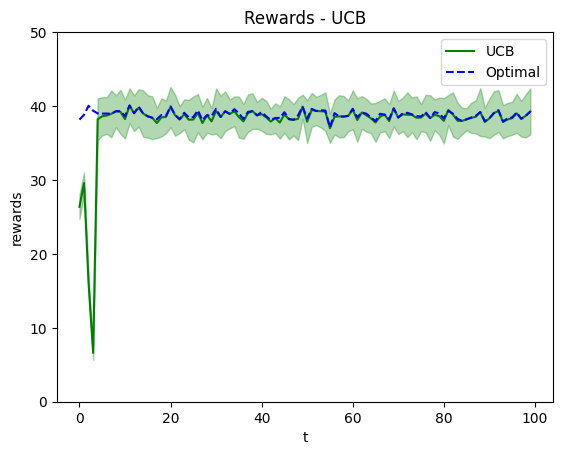

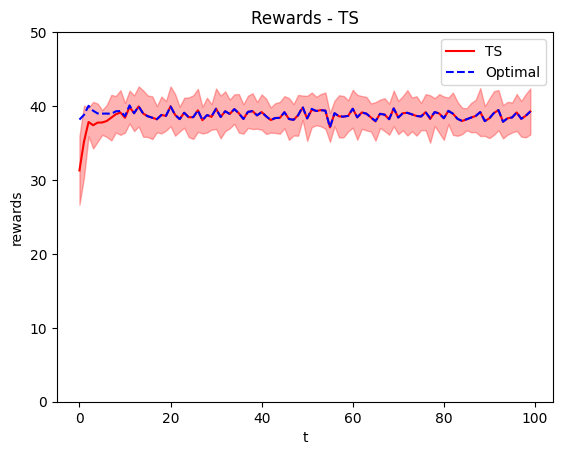

In [6]:
# REWARDS

means = np.average(ucb_results, axis=0)
std = np.std(ucb_results, axis=0)
optimal = np.average(optimal_results, axis=0)
fig, ax = plt.subplots()
plt.title("Rewards - UCB")
plt.xlabel("t")
plt.ylabel("rewards")
plt.ylim(0, 50)
ax.plot(means, 'g', label="UCB")
ax.fill_between(rounds, means-std, means+std, alpha=0.3, color='green')
ax.plot(optimal, 'b--', label="Optimal")
plt.legend()

means = np.average(ts_results, axis=0)
std = np.std(ts_results, axis=0)
optimal = np.average(optimal_results, axis=0)
fig, ax = plt.subplots()
plt.title("Rewards - TS")
plt.xlabel("t")
plt.ylabel("rewards")
plt.ylim(0, 50)
ax.plot(means, 'r', label="TS")
ax.fill_between(rounds, means-std, means+std, alpha=0.3, color='red')
ax.plot(optimal, 'b--', label="Optimal")
plt.legend()

plt.show()

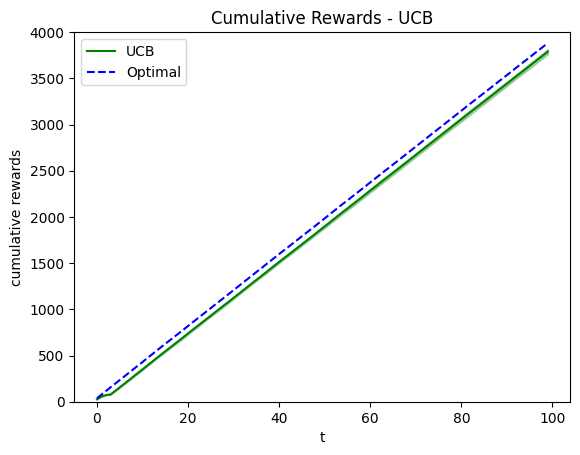

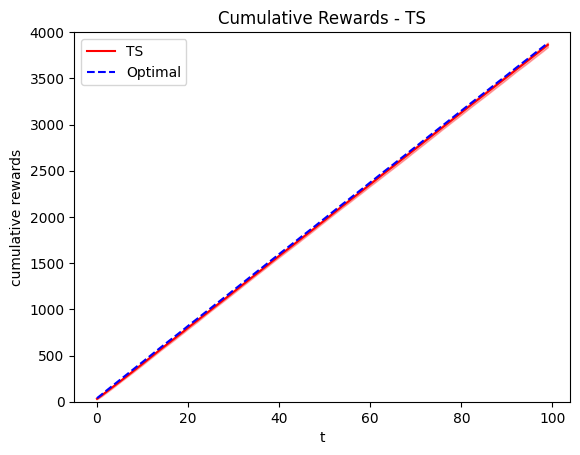

In [7]:
# CUMULATIVE REWARDS

means = np.average(np.cumsum(ucb_results, axis=1), axis=0)
std = np.std(np.cumsum(ucb_results, axis=1), axis=0)
optimal = np.average(np.cumsum(optimal_results, axis=1), axis=0)
fig, ax = plt.subplots()
plt.title("Cumulative Rewards - UCB")
plt.xlabel("t")
plt.ylabel("cumulative rewards")
plt.ylim(0, 4000)
ax.plot(means, 'g', label="UCB")
ax.fill_between(rounds, means-std, means+std, alpha=0.3, color='green')
ax.plot(optimal, 'b--', label="Optimal")
plt.legend()

means = np.average(np.cumsum(ts_results, axis=1), axis=0)
std = np.std(np.cumsum(ts_results, axis=1), axis=0)
optimal = np.average(np.cumsum(optimal_results, axis=1), axis=0)
fig, ax = plt.subplots()
plt.title("Cumulative Rewards - TS")
plt.xlabel("t")
plt.ylabel("cumulative rewards")
plt.ylim(0, 4000)
ax.plot(means, 'r', label="TS")
ax.fill_between(rounds, means-std, means+std, alpha=0.3, color='red')
ax.plot(optimal, 'b--', label="Optimal")
plt.legend()

plt.show()

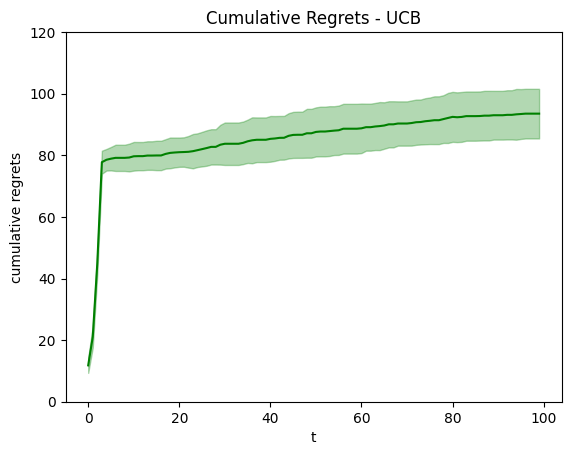

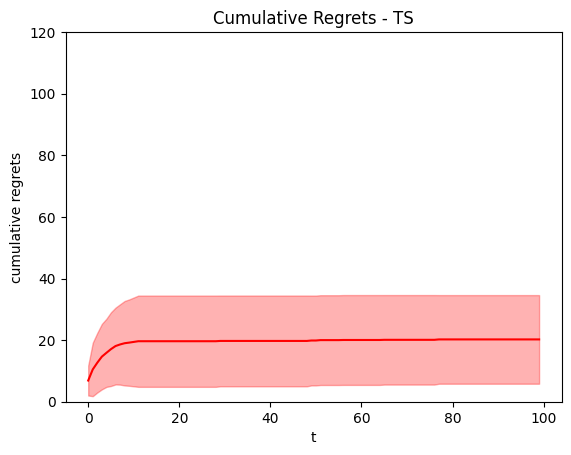

In [8]:
# CUMULATIVE REGRETS

means = np.average(np.cumsum(optimal_results - ucb_results, axis=1), axis=0)
std = np.std(np.cumsum(optimal_results - ucb_results, axis=1), axis=0)
fig, ax = plt.subplots()
plt.title("Cumulative Regrets - UCB")
plt.xlabel("t")
plt.ylabel("cumulative regrets")
plt.ylim(0, 120)
ax.plot(means, 'g')
ax.fill_between(rounds, means-std, means+std, alpha=0.3, color='green')

means = np.average(np.cumsum(optimal_results - ts_results, axis=1), axis=0)
std = np.std(np.cumsum(optimal_results - ts_results, axis=1), axis=0)
fig, ax = plt.subplots()
plt.title("Cumulative Regrets - TS")
plt.xlabel("t")
plt.ylabel("cumulative regrets")
plt.ylim(0, 120)
ax.plot(means, 'r')
ax.fill_between(rounds, means-std, means+std, alpha=0.3, color='red')

plt.show()